# Names:
Audrey Pohl, u0497618@utah.edu, u0497618 

Clarissa Seebohm, u0575630@utah.edu, u0575630 

Joseph Wirthlin, u0936690@utah.edu, u0935590 

# Project Description <br>

We all enjoy outdoor activities in Salt Lake City such as skiing, hiking, and camping in the wilderness surrounding Salt Lake City. For this reason, we value the Great Salt Lake for its contribution to the local ecosystem. With increased snowfall this winter, we are curious how much it will impact the level of the Salt Lake. Snowfall isn’t the only factor that can impact the water level. We will also analyze rainfall, total precipitation, snowfall, snow-water equivalent, and water usage in order to answer the following questions: Do rainfall and snowfall have different effects on water levels of the GSL? Does precipitation have a significant effect on water levels of GSL? Is more water diverted in wet years that reduce the effects on water levels?  Does precipitation or water usage have a more significant effect on water levels? We hope that these questions could provide insight on how the state of Utah needs to manage its water to preserve our ecosystem while supporting local business adequately. Discovering the impacts of different factors on the levels of the GSL could also reveal the most directly impactful ways to preserve the local ecosystem.  

# Data and Data Description <br>

In [2]:
import datetime
import pandas as pd 
lake_levels = pd.read_csv('monthly', sep = '\t', comment = '#') 
snow_water = pd.read_csv('state_of_utah_snow_water.csv') # snow water equivalent

october_snow = snow_water.loc[:30].mean()
november_snow = snow_water.loc[31:60].mean()
december_snow = snow_water.loc[61:91].mean()
january_snow = snow_water.loc[92:122].mean()
february_snow = snow_water.loc[124:151].mean()
march_snow = snow_water.loc[152:182].mean()
april_snow = snow_water.loc[183:212].mean()
may_snow = snow_water.loc[213:243].mean()
june_snow = snow_water.loc[244:273].mean()
july_snow = snow_water.loc[274:304].mean()
august_snow = snow_water.loc[305:334].mean()
september_snow = snow_water.loc[335:365].mean()

def populate_snow_datetime(data, month, start_year, df):
    for i in range(len(data)-10):
        temp = pd.DataFrame([[datetime.date(start_year+i,month,20), data[i]]],columns=['date','swe'])
        df = pd.concat([df,temp], ignore_index=True)
    return df

swe = pd.DataFrame(columns=['date','swe'])

swe = populate_snow_datetime(october_snow, 10, 1981, swe)
swe = populate_snow_datetime(november_snow, 11, 1981, swe)
swe = populate_snow_datetime(december_snow, 12, 1981, swe)
swe = populate_snow_datetime(january_snow, 1, 1981, swe)
swe = populate_snow_datetime(february_snow, 2, 1981, swe)
swe = populate_snow_datetime(march_snow, 3, 1981, swe)
swe = populate_snow_datetime(april_snow, 4, 1981, swe)
swe = populate_snow_datetime(may_snow, 5, 1981, swe)
swe = populate_snow_datetime(june_snow, 6, 1981, swe)
swe = populate_snow_datetime(july_snow, 7, 1981, swe)
swe = populate_snow_datetime(august_snow, 8, 1981, swe)
swe = populate_snow_datetime(september_snow, 9, 1981, swe)

def populate_lake_datetime(data, df):
    for i in range(len(data)-1):
        temp = pd.DataFrame([[datetime.date(int(data['year_nu'][i+1]),int(data['month_nu'][i+1]),20), float(data['mean_va'][i+1])]],columns=['date','lake_level'])
        df = pd.concat([df,temp], ignore_index=True)
    return df

lk_lvl = pd.DataFrame(columns=['date','lake_level'])
lk_lvl = populate_lake_datetime(lake_levels, lk_lvl)

combined = swe.merge(lk_lvl, on = 'date', how = 'outer')
combined_nan = combined[combined['lake_level'].isna()]
combined_even = combined.drop(combined_nan.index)

/var/folders/_8/kmm0qn3s0h986z7s1dmqcpsc0000gn/T/ipykernel_14649/3471489604.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  october_snow = snow_water.loc[:30].mean()
/var/folders/_8/kmm0qn3s0h986z7s1dmqcpsc0000gn/T/ipykernel_14649/3471489604.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  november_snow = snow_water.loc[31:60].mean()
/var/folders/_8/kmm0qn3s0h986z7s1dmqcpsc0000gn/T/ipykernel_14649/3471489604.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  december_snow = sno

The `lake_levels` variable comes from a United States Geological Survey (USGS) database of monthly Great Salt Lake water elevations. The values are monthly averages of the surface elevation of the lake in feet from sea level. The dataset has monthly data from October of 1989 to November of 2022. 
<br>
<br>
The `snow_water` variable comes from the Utah Snow Survey Program database provided by the US Department of Agriculuture. The values are daily snow-water equivalent levels that we averaged out on a monthly basis to match the dataset that we have on lake levels. This dataset has daily values from January 1981 to April 2023. For the final regression, we removed the dates that did not have values from both datasets. For this reason, our final data includes only the years 1989 to 2022. 


# Ethical Data Concerns <br>

We want to make sure that the data that we use will not cause harm to any stakeholders. In order to do so, we have identified the primary stakeholders related to this research are: Utah residents, the Utah government and policymakers, and Utah agriculture and watershed-reliant businesses. In order to prevent causing any harm to any individual stakeholder, we have decided to use water usage data on a state level so as not to unintentionally put blame on any types of water users. This is because some research that has been done in the past has left certain stakeholders feeling as if they are receiving a disproportionate amount of the blame and are under increasing pressure to decrease water use as a result of that research. We want to avoid this, so our data will not breakdown any type of water user to protect those stakeholders from experiencing something similar.  

# Methods <br>

To determine the best combination of variables that describe the GSL water elevation, we will optimize regression, linear regression, or logarithmic regression depending on which we find to suit the data best. Combining machine learning with regression methods, we will optimize the regressions and in an analytical way determine which dedcribes the data best. The library we will primarily use is make_regression from sci-kit learn. We will use pyplot to plot our results in interesting ways as the models optimize. We will also use pandas to clean our data to input to our regression models. 
<br>
<br>
To help users vizualize the relationships between factors of water elevation in the GSL, we will create a data visualization dashboard. For this Dash is the best option we have found. You can make highly interactive visualiztions with a Dash Python library. It requires some knowledge of Java and CSS which our team members have. Luckily you don't NEED to know either to create an awesome dashboard. We plan to allow the user to choose a date range, and variables to explore relationships themsevles. Our regression optimization analysis will also be included on the dashboard. 

# Preliminary Results <br>

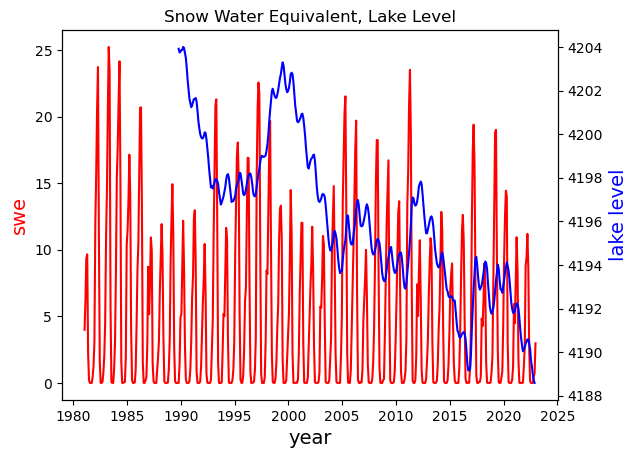

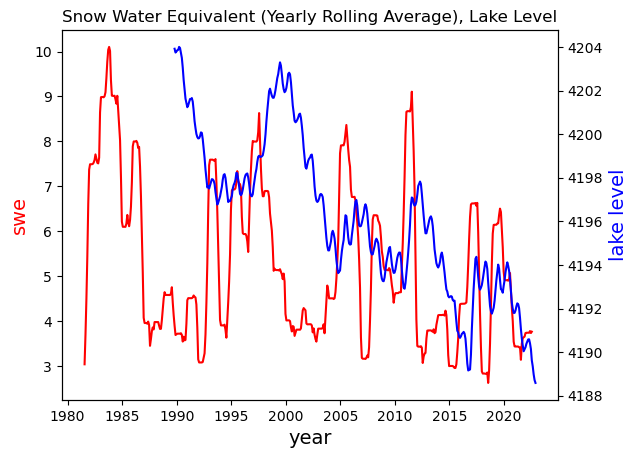

In [13]:
import matplotlib.pyplot as plt

swe = swe.sort_values(by='date')
#plt.plot(swe['date'], swe['swe'])
#plt.plot(lk_lvl['date'], lk_lvl['lake_level'])


# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(swe['date'],
        swe['swe'],
        color="red")
# set x-axis label
ax.set_xlabel("year", fontsize = 14)
# set y-axis label
ax.set_ylabel("swe",
              color="red",
              fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(lk_lvl['date'], lk_lvl['lake_level'],color="blue")
ax2.set_ylabel("lake level",color="blue",fontsize=14)
ax.set_title('Snow Water Equivalent, Lake Level')
plt.show()


# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(swe['date'],
        swe['swe'].rolling(window = 12, center = True).mean(),
        color="red")
# set x-axis label
ax.set_xlabel("year", fontsize = 14)
# set y-axis label
ax.set_ylabel("swe",
              color="red",
              fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(lk_lvl['date'], lk_lvl['lake_level'],color="blue")
ax2.set_ylabel("lake level",color="blue",fontsize=14)
ax.set_title('Snow Water Equivalent (Yearly Rolling Average), Lake Level')
plt.show()


In [52]:
import statsmodels.formula.api as sm
prelim_reg = sm.ols('lake_level ~ swe', data = combined_even).fit()
prelim_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             lake_level   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.433
Date:                Wed, 05 Apr 2023   Prob (F-statistic):              0.232
Time:                        19:14:17   Log-Likelihood:                -1068.3
No. Observations:                 398   AIC:                             2141.
Df Residuals:                     396   BIC:                             2149.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4196.0180      0.233    1.8e+04      0.000    4195.560    4196.476
swe            0.0361      0.030      1.197      0.232      -0.023       0.095
==============================================================================
Omnibus:                       15.881   Durbin-Watson:                   0.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                9.973
Skew:                           0.241   Prob(JB):                      0.00683
Kurtosis:                       2.393   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Based on our preliminary findings, there is a statistically significant effect of snow-water equivalents on lake levels of the Great Salt Lake. However, based on our preliminary findings, using a single variable regression model, the effect shown was quite small. The coefficient for this effect was only .036. As it currently stands, the interpretation of this finding is not so clear. Base on the data, this means that for one inch of water created from melted snow, the lake would rise .036 feet. Because of the difficulty of interpretation, it is not yet clear if this effect is larger or smaller than we expected. 
<br>
<br>
Another observation that is important to note is that the R-squared value is extremely low. It is clear that there are other variables that have a significant effect on the lake levels that we are not including in our preliminary research. We will want to discuss what other variables to include in the research and if we think that having a much higher R-squared is necessary for this to continue to be valuable research. 
<br>
<br>
One important observation that comes from the visualizations are that there seems to be a decreasing trend in snow-water equivalents over the years but that it is quite small. This seems clear in both the yearly, running average visualization as well as the regular monthly average plots. This could be attributed to climate change and other environmental factors that lead to less snowfall and water run-off from year to year. However, the decrease in lake levels has decreased at a much greater rate. This leads us to believe that there are other things that are driving the lake levels down with much larger effects. We are excited to see what the introduction of water usage data on the model does. 

# Peer Review <br>

Amit Galatzer, Dasha Romanova, Justin Schwendiman 
<br>
<br>
One of the main concerns that was brought up during this conversation was to make sure that we have a large enough sample size. We were considering using monthly data which would only give us 12 observations for each year that we use. Originally, we were considering only using about 10 years of data but this would only give us 120 observations. For that reason, it was brought up that we should use many more years to get a larger sample size that will aid us in finding more interesting trends. 
<br>
<br>
It was also mentioned that it could be interesting to include variables such as population growth or GDP growth to capture any effect of water usage that these types of events may cause. This would be able to create a better analysis because it would weed out some other important factors that could also be contributing to the lake levels. 

# Milestones Completed <br>

We have found, imported, and cleaned GSL lake elevation data, and snow-water equivalent data which was dated for completion by 4/7.

# Upcoming Milestones <br>

The upcoming milestone is to perform and plot exploratory analysis on the data. This is dated for completion by 4/14. This includes the optimization of regression with machine learning. We also need to complete root mean squared error (RMSE) for all groups of data in the project. 
<br>
<br>
The main analysis and dashboard completion is predicted to be completed by 4/21 which is the due date for this project. 

# Potential Modifications <br>

We originally planned to use a dataset from the department of natural resources to evaluate water usage, but we discoverd that this dataset only contains data for the years 2015-2020. Additionally, this dataset only measures municipal and industrial water use, instead of total water usage in the state. This would exclude the agriculture industry and would not be as useful of data as we might like. We will look into proxy variables that might be able to shed light on water usage better. 

# Project Summary <br>

So far, we have successfully compiled and cleaned the data that we planned on using to find the effect of the snow-water equivalent on the elevation of the Great Salt Lake. We have put together some basic visualizations to give ourselves an idea of what the effect might look like and have run a preliminary, single variable regression. We have found that there is an effect, as we expected there to be but we know we have more work to do to find a better and more robust effect size. In addition to potentially adding new variables and creating the more robust regression models, we also need to build out the dashboard and improve on the visualizations that we have already made. 

# Asessment <br>

Yes, our project is on track. Now that we have the majority of the data cleaned, we can focus on working through the machine learning optimization as well as the dashboard and the visualizations. We feel confident that this will be manageable to complete in the timeframes that we have set throughout these next three weeks. 